Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

What files are available in the noebook

In [2]:
!ls


DataExplorationCont.ipynb
DataInvestigation_Alex.ipynb
InitialDataExploration.ipynb
README.md
Untitled.ipynb
zippedData


Importing Data into dataframes

In [3]:
nameimdb = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
title_basics_or = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_basics_null_drop = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
title_principles = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

Looking at the contents of the dataframes

In [4]:
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [5]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [6]:
title_basics_or.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
title_basics_or.shape

(146144, 6)

In [9]:
title_basics_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Merging the IMDB title basic information with the IMDB title ratings information. This was done to match up the unique title code in each file so that the rating of the film was available in the same basic dataset. 

In [12]:
title_basics_or.shape

(146144, 6)

In [13]:
title_ratings.shape

(73856, 3)

In [14]:
title_basics_ratings = pd.merge(title_basics_or, title_ratings, how = 'left', on = 'tconst')

In [15]:
title_basics_ratings.shape

(146144, 8)

In [16]:
title_basics_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [18]:
title_basics_or.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


dropping null values from the runtime minutes column and genre column

In [19]:
title_basics_null_drop.dropna(subset = ['runtime_minutes', 'genres'], inplace = True)

In [20]:
title_basics_null_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112233 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112233 non-null  object 
 1   primary_title    112233 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112233 non-null  int64  
 4   runtime_minutes  112233 non-null  float64
 5   genres           112233 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
title_basics_ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,146144.000000,114405.000000,73856.000000,7.385600e+04
mean,2014.621798,86.187247,6.332729,3.523662e+03
std,2.733583,166.360590,1.474978,3.029402e+04
min,2010.000000,1.000000,1.000000,5.000000e+00
25%,2012.000000,70.000000,5.500000,1.400000e+01
50%,2015.000000,87.000000,6.500000,4.900000e+01
75%,2017.000000,99.000000,7.400000,2.820000e+02
max,2115.000000,51420.000000,10.000000,1.841066e+06


In [22]:
title_basics_ratings.corr()

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.001729,0.041294,-0.028481
runtime_minutes,0.001729,1.000000,-0.006963,0.012472
averagerating,0.041294,-0.006963,1.000000,0.044478
numvotes,-0.028481,0.012472,0.044478,1.000000


In [31]:
time_limit = title_basics_ratings[title_basics_ratings.runtime_minutes < 200]

I descided to put an upper limit on the runtime in minutes because the outliers were causing the majority of the data to be lost in the scatter plot. 

In [28]:
time_limit.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,62631.000000,62631.000000,28099.000000,28099.000000
mean,2014.292746,66.358113,6.393324,612.191857
std,2.603929,19.473970,1.582002,5925.237996
min,2010.000000,1.000000,1.000000,5.000000
25%,2012.000000,55.000000,5.400000,11.000000
50%,2014.000000,72.000000,6.600000,29.000000
75%,2016.000000,82.000000,7.500000,122.500000
max,2022.000000,89.000000,10.000000,403194.000000


<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

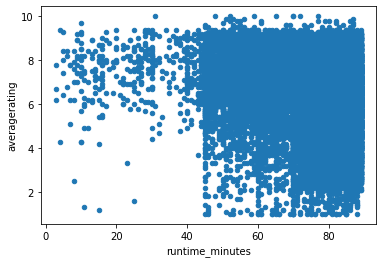

In [29]:
time_limit.plot.scatter(x = 'runtime_minutes', y = 'averagerating')

In [30]:
time_limit.corr()

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,-0.017920,0.001926,-0.023707
runtime_minutes,-0.017920,1.000000,-0.229668,0.073960
averagerating,0.001926,-0.229668,1.000000,-0.023079
numvotes,-0.023707,0.073960,-0.023079,1.000000
